<h1 align="center" ><div> APM4: Assignment 4 <br/> <i>Heart Disease Prediction</i></div></h1>

<h1 align="center" ><div> MARK-DANIELS TAMAKLOE <br/> <i></i></div></h1>


1. __Exploratory analysis of both the numerical and non-numerical features:__ Must "get to know" your data -- must show me you have a feel for the data's structure and content. 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd

First let's make sure the data is available. 

You should see __HeartDisease.csv__ in the listing below.

In [2]:
ls *.csv

 Volume in drive C is Windows
 Volume Serial Number is C2D6-EBDB

 Directory of C:\Users\manub\Downloads\Assignment4HeartDiseasePrediction

09/28/2022  01:38 PM            37,936 HeartDisease.csv
               1 File(s)         37,936 bytes
               0 Dir(s)  147,444,035,584 bytes free


The __HeartDisease__ data has a number of Features ( = clinical measurements) that we hope can be used to predict whether or not a given subject has heart disease ( __target = 0 or 1__ ). 

The subjects consist of a control group ( __target = 0__ ) and an experimental group ( __target = 1__ ), and for all the subjects, the following features are observed. 

    Age     = age in years 
    Sex     = male (= 1) or female ( = 0 )
    chstpn  = chest pain type 
    restbp  = resting blood pressure (in mm Hg on admission to the hospital)
    chol    = serum cholestoral in mg/dl
    fbs     = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg = resting electrocardiographic results
    maxhr   = maximum heart rate achieved
    exang   = exercise induced angina (1 = yes; 0 = no)
    oldpeak = ST depression induced by exercise relative to rest
    slope   = the slope of the peak exercise ST segment
    target  =  diagnosis of heart disease (angiographic disease status)
              -- Value 0: < 50% diameter narrowing
              -- Value 1: > 50% diameter narrowing 

Below we load the data. 

In [3]:
HeartDiseaseDf = pd.read_csv('HeartDisease.csv')
HeartDiseaseDf.head()

,Age,Sex,chstpn,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Now, we use summary to analyze our data as follows;

In [4]:
HeartDiseaseDf.describe()

,Age,restbp,chol,fbs,maxhr,oldpeak,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
##Numerical Features Only 
HeartDiseaseDf.select_dtypes([int,float])

,Age,restbp,chol,fbs,maxhr,oldpeak,target
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [6]:
##Numerical Features DataFrame
HDnumericDf = HeartDiseaseDf.select_dtypes([int,float])
HDnumericDf.head()

,Age,restbp,chol,fbs,maxhr,oldpeak,target
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


We now check the correlations between features to see how each feature is related to our target and also identify whether these features are capable of predicting the target variable.

In [12]:
matrix = HDnumericDf.corr()
print(matrix)

              Age    restbp      chol       fbs     maxhr   oldpeak    target
Age      1.000000  0.254399 -0.095282  0.198039 -0.382045  0.258612  0.282039
restbp   0.254399  1.000000  0.100893  0.070193 -0.112135  0.164803  0.107589
chol    -0.095282  0.100893  1.000000 -0.260974  0.235792  0.050148 -0.232741
fbs      0.198039  0.070193 -0.260974  1.000000 -0.131438  0.052698  0.267291
maxhr   -0.382045 -0.112135  0.235792 -0.131438  1.000000 -0.160691 -0.400421
oldpeak  0.258612  0.164803  0.050148  0.052698 -0.160691  1.000000  0.403951
target   0.282039  0.107589 -0.232741  0.267291 -0.400421  0.403951  1.000000


We realize that the restbp has the least  positve correlation with the target, so we drop the restbp to see if we can have a better fit of the model

In [59]:
X = HDnumericDf.drop('target', axis = 1)
y = HDnumericDf.target

X.head()

,Age,restbp,chol,fbs,maxhr,oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


We use the variance threshold to eliminate the features with little variance.

In [22]:
from sklearn.feature_selection import VarianceThreshold

p = 0.9  ## eliminate boolean if probability of either 1 or 0 exceeds p

sel = VarianceThreshold( threshold = p * (1-p) )
sel.fit(X)
sel.get_feature_names_out()

array(['Age', 'restbp', 'chol', 'fbs', 'maxhr', 'oldpeak'], dtype=object)

The variance threshold analysis seems to indicate that all the numeric features have high variance and hence are key in predicting the target.

Now, let us turn our attention to the non-numerical features in the data

In [23]:
HeartDiseaseDf.select_dtypes(exclude = [int,float])

,Sex,chstpn,restecg,exang,slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [95]:
from sklearn.preprocessing import OneHotEncoder

In [114]:
ohe = OneHotEncoder( dtype = int ) # We want integer 0 or 1
encoded = ohe.fit_transform( HeartDiseaseDf[ ['Sex'] ] )
encoded

ohe.categories_

oheDf = pd.DataFrame( encoded.todense(), 
                      columns = ohe.categories_[0])

HeartDiseaseDf_new = pd.concat([oheDf,HeartDiseaseDf], axis=1 )  
HeartDiseaseDf_new.head()

,F,M,Age,Sex,chstpn,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,target
0,0,1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,1,0,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,0,1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,1,0,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,0,1,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [113]:
ohe = OneHotEncoder( dtype = int ) # We want integer 0 or 1
encoded = ohe.fit_transform( HeartDiseaseDf[ ['chstpn'] ] )
encoded

ohe.categories_

oheDf1 = pd.DataFrame( encoded.todense(), 
                      columns = ohe.categories_[0])
HeartDiseaseDf_new1 = pd.concat([oheDf1,HeartDiseaseDf_new], axis=1 )  
HeartDiseaseDf_new1.head()

,ASY,ATA,NAP,TA,F,M,Age,Sex,chstpn,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,target
0,0,1,0,0,0,1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,0,0,1,0,1,0,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,0,1,0,0,0,1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,1,0,0,0,1,0,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,0,0,1,0,0,1,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [112]:
ohe = OneHotEncoder( dtype = int ) # We want integer 0 or 1
encoded = ohe.fit_transform( HeartDiseaseDf[ ['restecg'] ] )
encoded

ohe.categories_

oheDf2 = pd.DataFrame( encoded.todense(), 
                      columns = ohe.categories_[0])
HeartDiseaseDf_new2 = pd.concat([oheDf2,HeartDiseaseDf_new1], axis=1 )  
HeartDiseaseDf_new2.head()

,LVH,Normal,ST,ASY,ATA,NAP,TA,F,M,Age,...,chstpn,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,target
0,0,1,0,0,1,0,0,0,1,40,...,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,0,1,0,0,0,1,0,1,0,49,...,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,0,0,1,0,1,0,0,0,1,37,...,ATA,130,283,0,ST,98,N,0.0,Up,0
3,0,1,0,1,0,0,0,1,0,48,...,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,0,1,0,0,0,1,0,0,1,54,...,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [111]:
ohe = OneHotEncoder( dtype = int ) # We want integer 0 or 1
encoded = ohe.fit_transform( HeartDiseaseDf[ ['exang'] ] )
encoded

ohe.categories_

oheDf3 = pd.DataFrame( encoded.todense(), 
                      columns = ohe.categories_[0])
HeartDiseaseDf_new3 = pd.concat([oheDf3,HeartDiseaseDf_new2], axis=1 )  
HeartDiseaseDf_new3.head()

,N,Y,LVH,Normal,ST,ASY,ATA,NAP,TA,F,...,chstpn,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,target
0,1,0,0,1,0,0,1,0,0,0,...,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,1,0,0,1,0,0,0,1,0,1,...,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,1,0,0,0,1,0,1,0,0,0,...,ATA,130,283,0,ST,98,N,0.0,Up,0
3,0,1,0,1,0,1,0,0,0,1,...,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,1,0,0,1,0,0,0,1,0,0,...,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [116]:
ohe = OneHotEncoder( dtype = int ) # We want integer 0 or 1
encoded = ohe.fit_transform( HeartDiseaseDf[ ['slope'] ] )
encoded

ohe.categories_

oheDf4 = pd.DataFrame( encoded.todense(), 
                      columns = ohe.categories_[0])
HeartDiseaseDf_new4 = pd.concat([oheDf4,HeartDiseaseDf_new3], axis=1 )  
HeartDiseaseDf_new4.head()

,Down,Flat,Up,N,Y,LVH,Normal,ST,ASY,ATA,...,chstpn,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,target
0,0,0,1,1,0,0,1,0,0,1,...,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,0,1,0,1,0,0,1,0,0,0,...,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,0,0,1,1,0,0,0,1,0,1,...,ATA,130,283,0,ST,98,N,0.0,Up,0
3,0,1,0,0,1,0,1,0,1,0,...,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,0,0,1,1,0,0,1,0,0,0,...,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [118]:
HeartDiseaseDf_new4.select_dtypes([int,float]).head()

,Down,Flat,Up,N,Y,LVH,Normal,ST,ASY,ATA,...,TA,F,M,Age,restbp,chol,fbs,maxhr,oldpeak,target
0,0,0,1,1,0,0,1,0,0,1,...,0,0,1,40,140,289,0,172,0.0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,1,0,49,160,180,0,156,1.0,1
2,0,0,1,1,0,0,0,1,0,1,...,0,0,1,37,130,283,0,98,0.0,0
3,0,1,0,0,1,0,1,0,1,0,...,0,1,0,48,138,214,0,108,1.5,1
4,0,0,1,1,0,0,1,0,0,0,...,0,0,1,54,150,195,0,122,0.0,0


In [127]:
NewDf = HeartDiseaseDf_new4.select_dtypes([int,float])
NewDf.head()

,Down,Flat,Up,N,Y,LVH,Normal,ST,ASY,ATA,...,TA,F,M,Age,restbp,chol,fbs,maxhr,oldpeak,target
0,0,0,1,1,0,0,1,0,0,1,...,0,0,1,40,140,289,0,172,0.0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,1,0,49,160,180,0,156,1.0,1
2,0,0,1,1,0,0,0,1,0,1,...,0,0,1,37,130,283,0,98,0.0,0
3,0,1,0,0,1,0,1,0,1,0,...,0,1,0,48,138,214,0,108,1.5,1
4,0,0,1,1,0,0,1,0,0,0,...,0,0,1,54,150,195,0,122,0.0,0


In [140]:
X_1 = NewDf.drop('target', axis = 1)
y_1 = NewDf.target
X_1.head()

,Down,Flat,Up,N,Y,LVH,Normal,ST,ASY,ATA,NAP,TA,F,M,Age,restbp,chol,fbs,maxhr,oldpeak
0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,40,140,289,0,172,0.0
1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,49,160,180,0,156,1.0
2,0,0,1,1,0,0,0,1,0,1,0,0,0,1,37,130,283,0,98,0.0
3,0,1,0,0,1,0,1,0,1,0,0,0,1,0,48,138,214,0,108,1.5
4,0,0,1,1,0,0,1,0,0,0,1,0,0,1,54,150,195,0,122,0.0


In [141]:
X_1.corrwith(y_1)**2

Down       0.015013
Flat       0.307064
Up         0.387088
N          0.244315
Y          0.244315
LVH        0.000114
Normal     0.008387
ST         0.010512
ASY        0.266996
ATA        0.161543
NAP        0.045354
TA         0.003002
F          0.093297
M          0.093297
Age        0.079546
restbp     0.011575
chol       0.054168
fbs        0.071445
maxhr      0.160337
oldpeak    0.163176
dtype: float64

2. __Exploratory analysis of the principal components of at least one representation of the data.__  This data is not high dimensional, but how much of the variance is explained by the first few components (note: high variance in the first component is often a sign that pre-processing of the data is required). 

In [135]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 6)
HDComps = pca.fit_transform(X[['Age','restbp','chol','fbs','maxhr','oldpeak']])
pca.explained_variance_ratio_

array([9.20363279e-01, 4.91289978e-02, 2.50853558e-02, 5.33054787e-03,
       7.94938682e-05, 1.23259562e-05])

The Age feature alone explains about 92% of the variance so this implies, the mean and standard deviation alone are not sufficent in explaining all the variations in the data. Thus, we look at clustering and homogeneity.

In [136]:
HDCompsDf = pd.DataFrame(HDComps, columns = ['pc1','pc2','pc3','pc4','pc5','pc6'])
HDCompsDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,92.310596,-29.435969,-12.025021,-9.114455,-0.546531,-0.051898
1,-17.143937,-13.737187,-31.482925,-5.493955,0.156975,-0.252893
2,81.906347,38.236632,16.067617,-21.112484,-0.692206,-0.030050
3,13.654504,28.739039,2.731281,-10.149125,0.593045,-0.193413
4,-4.348715,18.108827,-13.443270,-3.999148,-1.047218,-0.255884


3. __Clustering and homogeneity of at least one representation of the data:__  Explore "if" and "how well" a clustering of the data into two clusters "matches" the target's labeling of the observations. 

In [145]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import homogeneity_score, completeness_score, rand_score  
homogeneity_score(y_1,preds)

0.0838750860612933

In [144]:
completeness_score(y,preds)

0.11953063904650525

In [52]:
rand_score(,preds)

0.5158219352202289

In [166]:
clstr = SpectralClustering(n_clusters = 2, 
                           affinity = 'nearest_neighbors',
                           n_neighbors=20,
                           assign_labels='cluster_qr')
preds = clstr.fit_predict( HDCompsDf[['pc1']])

C:\Users\manub\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


homogeneity score = 0.08388


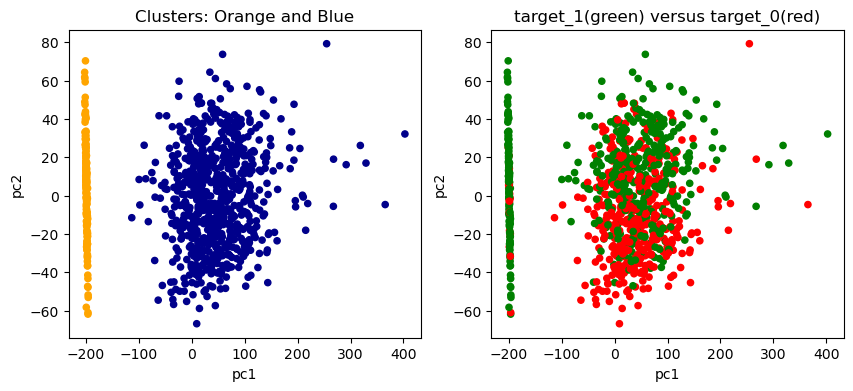

In [158]:
fig,ax = plt.subplots(1,2,figsize = (10,4));
clrs = [ ['orange','darkblue'][i] for i in preds]
HDCompsDf[['pc1','pc2']].plot.scatter('pc1','pc2', color = clrs, ax = ax[0],
                      title = 'Clusters: Orange and Blue');
clrs = [ ['red','green'][i] for i in y]
HDCompsDf[['pc1','pc2']].plot.scatter('pc1','pc2', color = clrs, ax = ax[1],
                      title = 'target_1(green) versus target_0(red)');
print('homogeneity score = %.5f' % homogeneity_score(y, preds))

In [170]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_1, y_1)
model.coef_[0]

C:\Users\manub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-0.04859729,  1.23984056, -1.17159114, -0.39482409,  0.41447621,
        0.15625887, -0.07594902, -0.06065772,  1.14449465, -0.59064825,
       -0.45458653, -0.07960774, -0.69158982,  0.71124194,  0.01039459,
        0.00194204, -0.00423273,  0.87867908, -0.00756291,  0.37939858])

Now we, rescale the data using the minimax scaler.

In [171]:
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler( feature_range = (0,1) )
ScaledX_1Array = sclr.fit_transform(X_1) 
ScaledX_1 = pd.DataFrame(ScaledFeaturesArray,
                              columns = X_1.columns,
                              index = X_1.index)
ScaledX_1.head()

,Down,Flat,Up,N,Y,LVH,Normal,ST,ASY,ATA,NAP,TA,F,M,Age,restbp,chol,fbs,maxhr,oldpeak
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.244898,0.70,0.479270,0.0,0.788732,0.295455
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.428571,0.80,0.298507,0.0,0.676056,0.409091
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.183673,0.65,0.469320,0.0,0.267606,0.295455
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.408163,0.69,0.354892,0.0,0.338028,0.465909
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.530612,0.75,0.323383,0.0,0.436620,0.295455


In [172]:
model = LogisticRegression()
model.fit(ScaledX_1, y_1)
model.coef_[0]

array([ 0.03686461,  1.19125315, -1.22807667, -0.48426184,  0.48430292,
        0.11191354, -0.04360257, -0.06826988,  1.19183546, -0.61701381,
       -0.41380462, -0.16097595, -0.69977239,  0.69981347,  0.80520964,
        0.35470664, -1.74104343,  1.09761185, -0.52386761,  1.70494558])

X_1: Down, Score: 0.03686
X_1: Flat, Score: 1.19125
X_1: Up, Score: -1.22808
X_1: N, Score: -0.48426
X_1: Y, Score: 0.48430
X_1: LVH, Score: 0.11191
X_1: Normal, Score: -0.04360
X_1: ST, Score: -0.06827
X_1: ASY, Score: 1.19184
X_1: ATA, Score: -0.61701
X_1: NAP, Score: -0.41380
X_1: TA, Score: -0.16098
X_1: F, Score: -0.69977
X_1: M, Score: 0.69981
X_1: Age, Score: 0.80521
X_1: restbp, Score: 0.35471
X_1: chol, Score: -1.74104
X_1: fbs, Score: 1.09761
X_1: maxhr, Score: -0.52387
X_1: oldpeak, Score: 1.70495


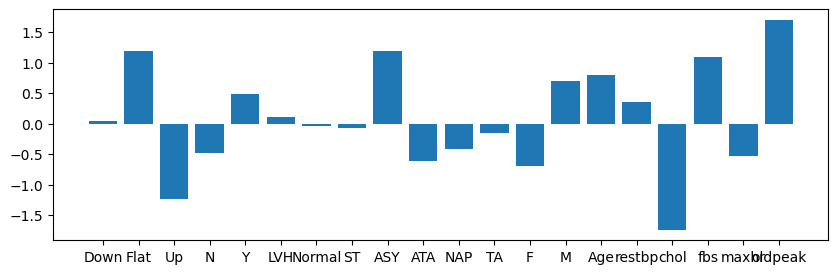

In [176]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('X_1: %s, Score: %.5f' % (X_1.columns[i],v))
# plot feature importance
plt.figure(figsize=(10,3))
plt.bar(X_1.columns, importance);

We take out the columns that are not significant.

In [181]:
InsignificantColumns = ['Down','LVH','Normal','ST', 'TA', 'restbp']
ReducedFeaturesHD = ScaledX_1.drop(InsignificantColumns, axis = 1)
ReducedFeaturesHD.head()

,Flat,Up,N,Y,ASY,ATA,NAP,F,M,Age,chol,fbs,maxhr,oldpeak
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.244898,0.479270,0.0,0.788732,0.295455
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.428571,0.298507,0.0,0.676056,0.409091
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.183673,0.469320,0.0,0.267606,0.295455
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.408163,0.354892,0.0,0.338028,0.465909
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.530612,0.323383,0.0,0.436620,0.295455


In [182]:
model = LogisticRegression()
model.fit(ReducedFeaturesHD, y_1)
model.coef_[0]

array([ 1.15843636, -1.25945781, -0.48488945,  0.48501027,  1.28684758,
       -0.53446306, -0.32178348, -0.69292146,  0.69304228,  0.88799641,
       -1.66557485,  1.09383804, -0.47778844,  1.73656102])

Feature: Flat, Score: 1.15844
Feature: Up, Score: -1.25946
Feature: N, Score: -0.48489
Feature: Y, Score: 0.48501
Feature: ASY, Score: 1.28685
Feature: ATA, Score: -0.53446
Feature: NAP, Score: -0.32178
Feature: F, Score: -0.69292
Feature: M, Score: 0.69304
Feature: Age, Score: 0.88800
Feature: chol, Score: -1.66557
Feature: fbs, Score: 1.09384
Feature: maxhr, Score: -0.47779
Feature: oldpeak, Score: 1.73656


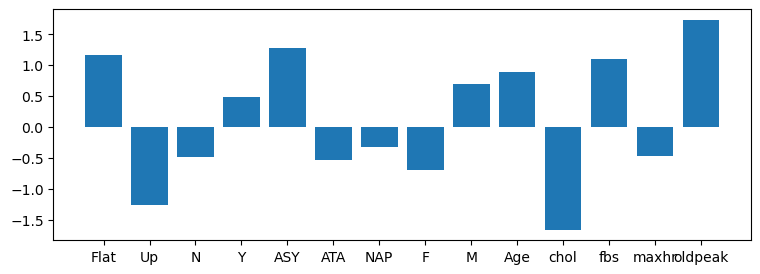

In [183]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (ReducedFeaturesHD.columns[i],v))
# plot feature importance
plt.figure(figsize=(9,3))
plt.bar(ReducedFeaturesHD.columns, importance);

So next we want to see whether we can use our representation to produce a good nearest neighbor classifier

In [184]:
from sklearn.model_selection import train_test_split 
ReducedFeaturesHDtrain, ReducedFeaturesHDtest, y_1train, y_1test = train_test_split(ReducedFeaturesHD,y_1, test_size = 0.2 )

In [213]:
from sklearn.neighbors import KNeighborsClassifier
kNNclf = KNeighborsClassifier(n_neighbors = 21) 
kNNclf.fit(ReducedFeaturesHDtrain, y_1train)

y_1pred = kNNclf.predict(ReducedFeaturesHDtest)
y_1prob = model.predict_proba(ReducedFeaturesHDtest)[:,1]
kNNclf.score(ReducedFeaturesHDtest, y_1test)

0.8586956521739131

In [214]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(kNNclf, ReducedFeaturesHD, y_1, cv=5)
scores

array([0.92391304, 0.8423913 , 0.85326087, 0.84153005, 0.76502732])

In [215]:
scores.mean()  # Must improve to over 80% average accuracy

0.8452245188880969

Now, we have an accuracy of about 85% which is somewhat a good score.

In [218]:
actpredDf = pd.DataFrame( {'actual':y_1test.values, 'predicted':y_1pred, 'prob':y_1prob} )
actpredDf.head()

,actual,predicted,prob
0,1,1,0.809524
1,0,0,0.047619
2,0,0,0.047619
3,0,0,0.000000
4,0,1,0.809524


In [219]:
confusion_matrix = pd.crosstab(actpredDf['actual'], actpredDf['predicted'], 
                               rownames=['Actual'], colnames=['Predicted'], margins = True)
confusion_matrix

Predicted,0,1,All
Actual,,,
0,61,17,78
1,9,97,106
All,70,114,184


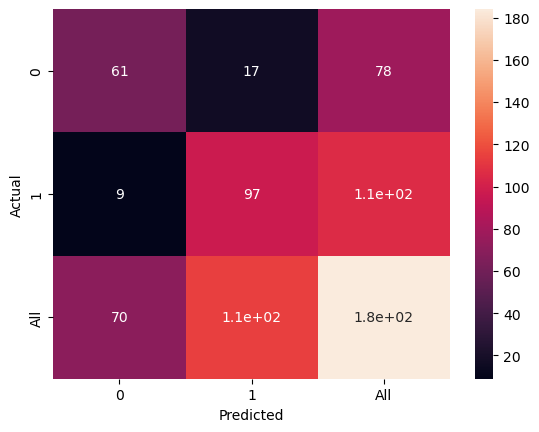

In [220]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True);

5. __ROC-AUC from estimator:__ A final ROC curve with AUC __from_estimator__ using Xtest, ytest from a train, test split of the data.

Now, let us consider the Receiver Operating Characteristic. 

In [240]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [241]:
fpr, tpr, lvls = roc_curve(actpredDf.actual, actpredDf.predicted)
fpr

array([0.        , 0.21794872, 1.        ])

In [242]:
fpr, tpr, lvls = roc_curve(actpredDf.actual, actpredDf.prob)
fpr

array([0.        , 0.        , 0.03846154, 0.03846154, 0.03846154,
       0.11538462, 0.11538462, 0.14102564, 0.20512821, 0.21794872,
       0.21794872, 0.23076923, 0.23076923, 0.23076923, 0.25641026,
       0.28205128, 0.35897436, 0.3974359 , 0.46153846, 0.73076923,
       1.        ])

In [244]:
auc(fpr,tpr)

0.9277939042089985

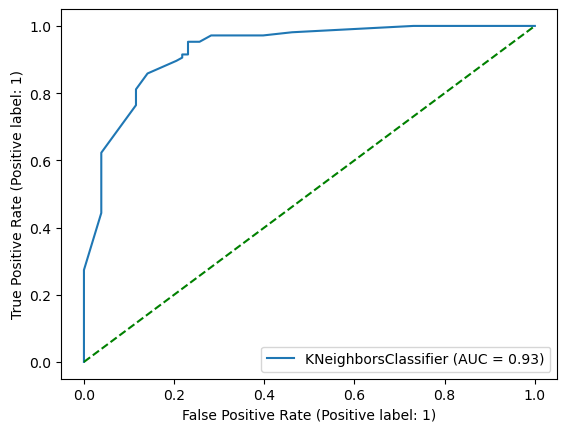

In [243]:
RocCurveDisplay.from_estimator(model, ReducedFeaturesHDtest,y_1test)
plt.plot(np.arange(0,11)/10, np.arange(0,11)/10, 'g--');

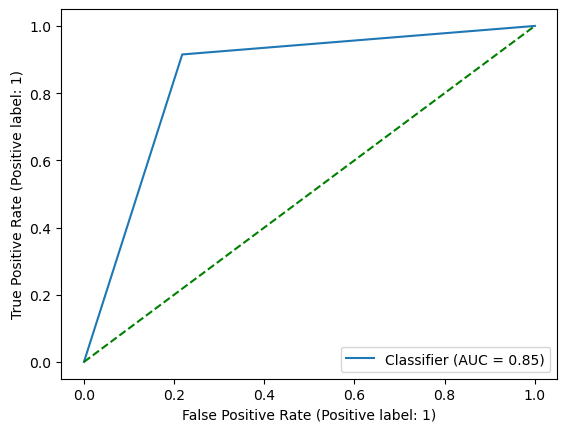

In [245]:
RocCurveDisplay.from_predictions(actpredDf.actual, actpredDf.predicted)
plt.plot(np.arange(0,11)/10, np.arange(0,11)/10, 'g--');